In [3]:
"""=============================================================================
Ex2: PCA - sklearn --> mở rộng thêm phân tích phương sai để xác định k
    a) Đọc tập tin dữ liệu Classification_12f_C.xls vào dataframe.
    b) Áp dụng phương pháp PCA để giảm xuống k chiều (2 < k).
       Giải thích nguyên nhân hay cơ sở về số chiều được giảm.
    c) Giảm chiều xuống còn k = 2 và trực quan hóa dữ liệu. Nhận xét kết quả.
    d) CHUẨN HÓA dữ liệu, sau đó thực hiện PCA.
============================================================================="""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib.gridspec import GridSpec

from sklearn.decomposition import PCA #By default, PCA() from sklearn will use SVD model to decompose covariance matrix
from sklearn.preprocessing import StandardScaler

print('\n=============================================================')
print('*** a) Read data Classification_12f_C.xls into dataframe df_stud12f  ***')
print('=============================================================')

df_stud12f = pd.read_excel('/home/long/Documents/DataScience_hcmus/3.MathStatist_for_DS/BT_thuc_hanh/Data/B3/Student_12f_C.xls')
print('\nFirst 10 rows of df_stud12f '+str(df_stud12f.shape)+' =\n',df_stud12f.head(10))


*** a) Read data Classification_12f_C.xls into dataframe df_stud12f  ***

First 10 rows of df_stud12f (1000, 13) =
           f1         f2        f3        f4        f5         f6         f7  \
0  -2.403589  -0.218339 -3.015506  2.187585 -1.415101  -0.000049   2.920957   
1  -0.922966   6.564721  8.542600 -3.676891  1.526910  -6.132242  -1.284702   
2   9.381326  -0.157043  9.674137  4.059390  9.150245  -8.320246  10.076978   
3  -7.610665 -10.375051  0.398027 -6.178855  5.848558   2.276540  -1.726164   
4   8.586239  -4.265564  4.788978  4.309953  2.938052  -4.294121   6.980088   
5   8.654652  -2.984309 -2.055992  3.094044  7.124673   6.999557  -0.560616   
6   1.941218   4.264816  9.281359 -2.613482  4.311070 -12.233243  -0.869871   
7   1.181965  -0.209686 -3.057244  2.908489 -2.521907   2.277894   6.753477   
8  -6.955220  -8.906775  2.367034 -4.655107  4.915654  -1.314149   2.082033   
9  12.120957  -0.055549 -9.617384  0.544594  8.409874   9.416641   0.317662   

          f8 


*** b) Use PCA to retains only k components of df_stud12f  (k>2) ***
-------------------------------------------------------------
METHOD 1: choose k based on the curve of cumulative variance 
-------------------------------------------------------------
ELBOW Method: choose k based on the rupture point of cumulative variance curve


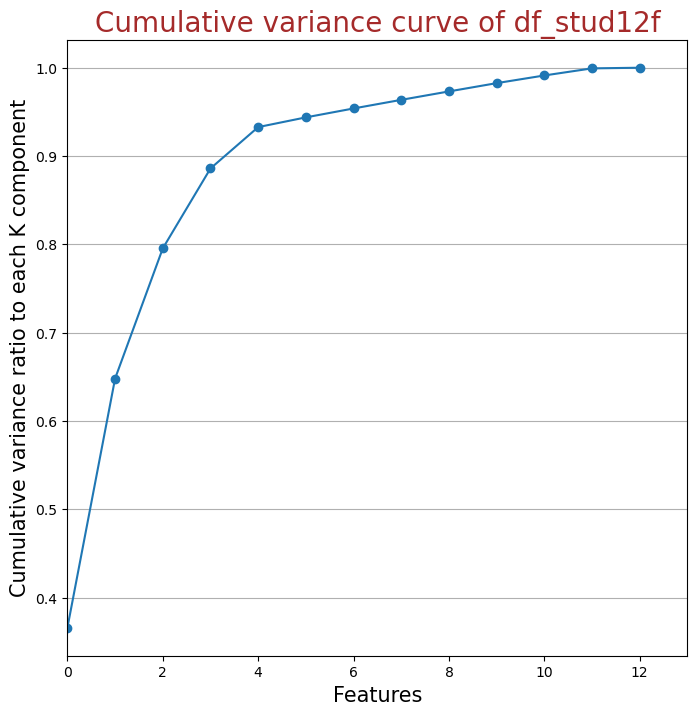


Print out the cumulative variance ratio to each K component
---The cumulative variance ratio for k = 1: 64.80% ---The increase value = 64.80%
---The cumulative variance ratio for k = 2: 79.54% ---The increase value = 14.74%
---The cumulative variance ratio for k = 3: 88.59% ---The increase value = 9.05%
---The cumulative variance ratio for k = 4: 93.28% ---The increase value = 4.68%
---The cumulative variance ratio for k = 5: 94.38% ---The increase value = 1.10%
---The cumulative variance ratio for k = 6: 95.39% ---The increase value = 1.01%
---The cumulative variance ratio for k = 7: 96.36% ---The increase value = 0.98%
---The cumulative variance ratio for k = 8: 97.32% ---The increase value = 0.95%
---The cumulative variance ratio for k = 9: 98.25% ---The increase value = 0.94%
---The cumulative variance ratio for k = 10: 99.12% ---The increase value = 0.87%
---The cumulative variance ratio for k = 11: 99.93% ---The increase value = 0.80%
---The cumulative variance ratio for k = 12:

In [5]:
print('\n=============================================================')
print('*** b) Use PCA to retains only k components of df_stud12f  (k>2) ***')
print('=============================================================')
#   https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
#   - The pca.explained_variance_ratio_ returns a vector of the variance explained by each dimension.
#   - The pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.
#   - The pca.explained_variance_ratio_.cumsum() will return a vector x 
#     such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

#   (1) PCA().components_: Chuyển vị của ma trận vectơ riêng EigenVectors.T
#   (2) PCA().explained_variance_: Các giá trị riêng
#   (3) PCA().explained_variance_ratio_: Tỷ lệ phương sai so với dữ liệu gốc
#   (4) Hàm numpy.cumsum()

print('-------------------------------------------------------------')
print('METHOD 1: choose k based on the curve of cumulative variance ')
print('-------------------------------------------------------------')

pca_stud12f = PCA().fit(df_stud12f) #The PCA() function is to create a PCA object
                                    # the .fit() method of PCA object is to apply PCA model into the database df_stud12f
                                    # the results will be assigned to pca_stud12f variable

print('ELBOW Method: choose k based on the rupture point of cumulative variance curve')
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca_stud12f.explained_variance_ratio_), marker='o')
plt.title('Cumulative variance curve of df_stud12f', color='brown', size='20')
plt.xlabel('Features',size=15)
plt.ylabel('Cumulative variance ratio to each K component', size=15)
plt.xlim(0,len(df_stud12f.columns))
plt.grid(axis='y') #To create horizontal lines go accross each value appear on y axis
plt.show()

#print(np.cumsum(pca_stud12f.explained_variance_ratio_))
print('\nPrint out the cumulative variance ratio to each K component')

cum_var=0.0
for k in range(1,len(df_stud12f.columns)):
    new_cum_var = np.cumsum(pca_stud12f.explained_variance_ratio_)[k]*100 #Get the cumulative variance ratio to component k
    print('---The cumulative variance ratio for k = %.f'%k+': %.2f%%' %new_cum_var + ' ---The increase value = %.2f%%' %(new_cum_var-cum_var))
    cum_var = new_cum_var

print('\nAs we can see, for k = 5, we can retain upto 94.38% of information. Therefor, can reduce the data into 5 dimensions')

In [15]:
print('---------------------------------------------------------------------------')
print('METHOD 2: set a wanted threshold of cumulative variance ratio, then find K')
print('---------------------------------------------------------------------------')

threshold = 0.9
percent = threshold*100

pca_stud12f = PCA(threshold) #Create a PCA object with cumulative variance ratio = 0.9 = 90%
pca_stud12f.fit(df_stud12f)  #Apply the 0.9 PCA model into the df_stud12f

k = pca_stud12f.n_components_ #Assign the number of components relevant to 90%
var = sum(pca_stud12f.explained_variance_ratio_) #Sum all the variance_ratio of pca_stud12f up to k component

print('To achieve cumulative variance ratio >= %.2f%%'%percent+',the number of components k must be %.f'%k)

print('\nCheck the method with for loop:')

for threshold in [0.3, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    percent = threshold*100
    pca = PCA(threshold)
    pca.fit(df_stud12f)
    k = pca.n_components_
    var = sum(pca.explained_variance_ratio_)

    print('To achieve cumulative variance ratio >= %.2f%%'%percent+', the number of compopnents k must be %.f'%k)
    

---------------------------------------------------------------------------
METHOD 2: set a wanted threshold of cumulative variance ratio, then find K
---------------------------------------------------------------------------
To achieve cumulative variance ratio >= 90.00%,the number of components k must be 5

Check the method with for loop:
To achieve cumulative variance ratio >= 30.00%, the number of compopnents k must be 1
To achieve cumulative variance ratio >= 60.00%, the number of compopnents k must be 2
To achieve cumulative variance ratio >= 70.00%, the number of compopnents k must be 3
To achieve cumulative variance ratio >= 80.00%, the number of compopnents k must be 4
To achieve cumulative variance ratio >= 90.00%, the number of compopnents k must be 5
To achieve cumulative variance ratio >= 95.00%, the number of compopnents k must be 7
To achieve cumulative variance ratio >= 99.00%, the number of compopnents k must be 11



*** c) Reduce the data into 2 components only (k=2) then visualize it  ***
     Principal_Component_1  Principal_Component_2  Class
0                -0.692211              -1.070005      3
1                -4.781787              -3.437346      4
2               -16.692405              -8.542941      0
3                -3.687761              24.972640      2
4                -8.926874              -9.483645      0
..                     ...                    ...    ...
995              -3.210477              -1.198732      4
996              -5.786743              19.885828      2
997              -2.899157              -7.055390      3
998              -4.651700              -4.684545      5
999              -4.630141              22.027259      2

[1000 rows x 3 columns]


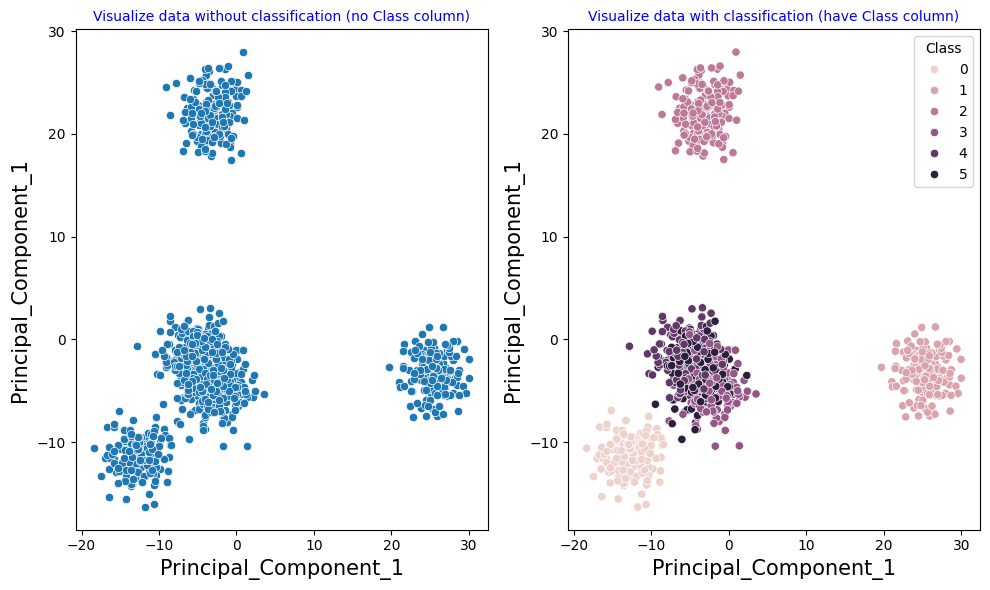


Since we keep only 2 components, many data from different classes have been overlapped
which demonstrates the lost of information (k=2 retains only 79.54% of original data)


In [29]:
print('\n=============================================================')
print('*** c) Reduce the data into 2 components only (k=2) then visualize it  ***')
print('=============================================================')

pca_stud2f = PCA(n_components=2).fit(df_stud12f).transform(df_stud12f) #PCA(n_components=2) to create a PCA object having 2 components
                                                                # .fit() method to apply the 2-component PCA model to df_stud12f data
                                                             # .transform() method to transform the output of .fit() into a matrix

df_stud2f = pd.DataFrame(pca_stud2f) #Convert the results matrix into a dataframe
df_stud2f.columns = ['Principal_Component_1', 'Principal_Component_2'] #Name the columns for df_stud2f
df_stud2f['Class'] = df_stud12f.Class #Add new column named Class of df_stud2f, has the same values as column df_stud12f.Class
print(df_stud2f)


fig = plt.figure(figsize=(10,6))
grsp = GridSpec(nrows=1, ncols=2)

no_class = fig.add_subplot(grsp[0,0]) #Visualize data without classification (no Class column)
sbn.scatterplot(data=df_stud2f, x='Principal_Component_1', y='Principal_Component_2')
no_class.set_title('Visualize data without classification (no Class column)', color='blue', size=10)
no_class.set_xlabel('Principal_Component_1', size =15)
no_class.set_ylabel('Principal_Component_1', size =15)

have_class = fig.add_subplot(grsp[0,1]) #Visualize data with classification (have Class column)
sbn.scatterplot(data=df_stud2f, x='Principal_Component_1', y='Principal_Component_2', hue='Class')
have_class.set_title('Visualize data with classification (have Class column)', color='blue', size=10)
have_class.set_xlabel('Principal_Component_1', size =15)
have_class.set_ylabel('Principal_Component_1', size =15)

fig.tight_layout()

plt.show()

print("\nSince we keep only 2 components, many data from different classes have been overlapped") 
print("which demonstrates the lost of information (k=2 retains only 79.54% of original data)")


*** d) Standardize data, then do PCA with k=2 and visualize ***
The standardized df_stud12f_norm =
            0         1         2         3         4         5         6   \
0   -0.932461 -0.188014 -0.650051  0.472762 -0.422844  0.202860  0.298135   
1   -0.686963  0.978499  1.215289 -0.873189  0.067499 -0.992452 -0.401489   
2    1.021566 -0.177473  1.397906  0.902359  1.338075 -1.418947  1.488561   
3   -1.795833 -1.934710 -0.099147 -1.447413  0.787785  0.646623 -0.474928   
4    0.889735 -0.884034  0.609500  0.959865  0.302693 -0.634158  0.973384   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.447022  0.561585  0.841989  0.002299 -0.229137 -1.384785 -0.454429   
996 -2.047569 -1.402942  0.058124 -1.260240  0.593805 -0.112219 -0.081103   
997  0.050746  0.339319 -0.404913  1.224433 -0.299970  1.260385  0.830087   
998  0.681584 -0.627005 -0.369019  0.440876  1.058203  1.475706  0.022387   
999 -1.638402 -1.238684  0.365245 -1.377705  0.41243

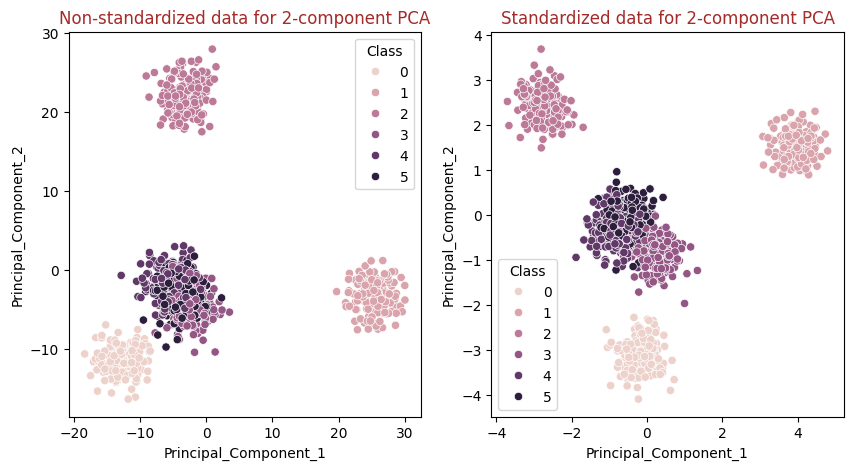


After standardizing, some data layers of some classes have moved away from the overlapping zone


In [32]:
print('\n=============================================================')
print('*** d) Standardize data, then do PCA with k=2 and visualize ***')
print('=============================================================')

#===================================================================================#
#Use sklearn.preprocessing.StandardScaler() to standardize the date
# StandardScaler() will calculate the mean and standard deviation (SD) of the data
# then, for each point of data (assume X), it will calculate the standardized value Z = (X - mean)/SD
#===================================================================================#

df_stud2f = pd.DataFrame(PCA(n_components=2).fit(df_stud12f).transform(df_stud12f))
df_stud2f.columns = ['Principal_Component_1', 'Principal_Component_2']
df_stud2f['Class'] = df_stud12f.Class

#Standardize the data with StandardScaler
std_stud12f_norm = StandardScaler().fit(df_stud12f).transform(df_stud12f) #StandardScaler() to create a StandardScaler object
                                                                         # .fit() method to apply StandardScaler to the df_stud12f
                                                                         # .transform() to convert the results into a matrix

df_stud12f_norm = pd.DataFrame(std_stud12f_norm) #convert the result matrix into a data frame
print('The standardized df_stud12f_norm =\n',df_stud12f_norm)

#Do PCA with standardized data df_stud12f_norm
pca_stud2f_norm = PCA(n_components=2).fit(df_stud12f_norm).transform(df_stud12f_norm)
df_stud2f_norm = pd.DataFrame(pca_stud2f_norm)
df_stud2f_norm.columns = ['Principal_Component_1', 'Principal_Component_2']
df_stud2f_norm['Class']=df_stud12f.Class
print('\nThe 2-component PCA of standardized data df_stud2f_norm =\n',df_stud2f_norm)

#Visualize the non-standardized and standardized 2-component PCA data
fig = plt.figure(figsize=(10,5))

grsp = GridSpec(nrows=1, ncols=2)

non_std_data = fig.add_subplot(grsp[0,0])
sbn.scatterplot(data=df_stud2f, x='Principal_Component_1', y='Principal_Component_2', hue='Class')
non_std_data.set_title('Non-standardized data for 2-component PCA', color='brown')

std_data = fig.add_subplot(grsp[0,1])
sbn.scatterplot(data=df_stud2f_norm, x='Principal_Component_1', y='Principal_Component_2', hue='Class')
std_data.set_title('Standardized data for 2-component PCA', color='brown')

#fig.tight_layout()
plt.show()

print("\nAfter standardizing, some data layers of some classes have moved away from the overlapping zone")